# **Homework 2**

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Problem 1A

In [ ]:
# Get our tokens from words
words = 'sun sky day night cloud cloudy rain storm stormy moon thunder lightning sunny'
tokens = tokenizer.tokenize(words)
print('tokens: ', tokens)

# Get our ids from tokens (id corresponds to id in one-hot vector)
ids = tokenizer.convert_tokens_to_ids(tokens)
print('ids: ', ids)

# To tensor
input_ids = torch.tensor([ids])
print('input ids: ', input_ids)

# Get the embedded set of tokens
with torch.no_grad():
  embeddings = model.embeddings.word_embeddings(input_ids)
print('embeddings.shape: ', embeddings.shape)

tokens:  ['sun', 'sky', 'day', 'night', 'cloud', 'cloudy', 'rain', 'storm', 'stormy', 'moon', 'thunder', 'lightning', 'sunny']
ids:  [3103, 3712, 2154, 2305, 6112, 24706, 4542, 4040, 24166, 4231, 8505, 7407, 11559]
input ids:  tensor([[ 3103,  3712,  2154,  2305,  6112, 24706,  4542,  4040, 24166,  4231,
          8505,  7407, 11559]])
embeddings.shape:  torch.Size([1, 13, 768])


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np

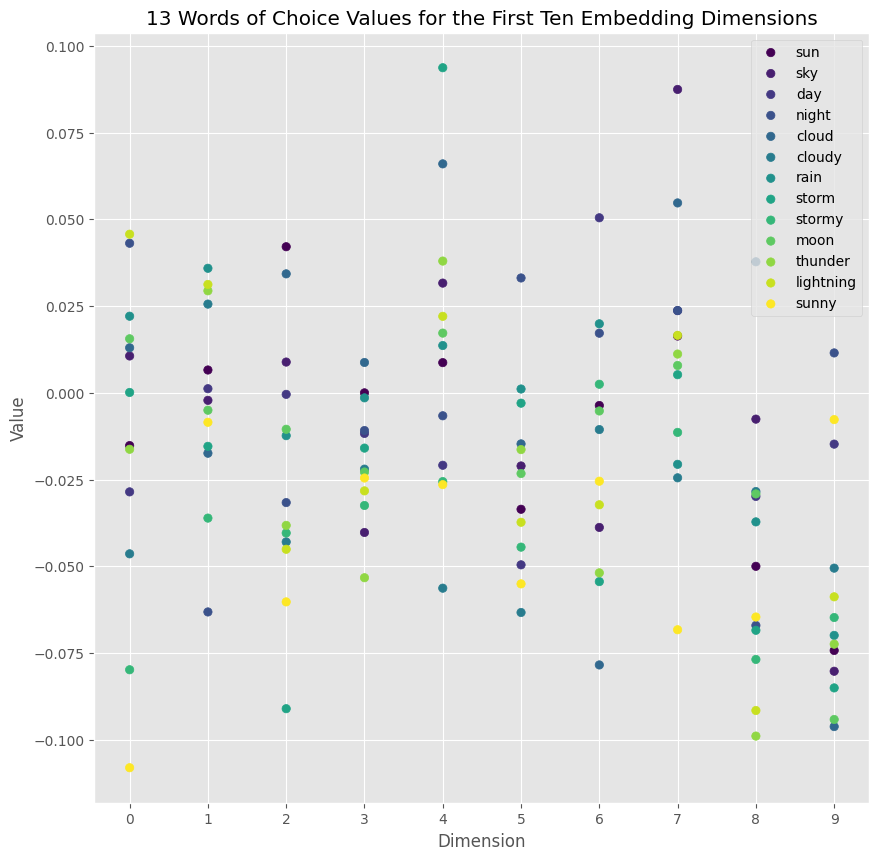

In [ ]:
# Embed (at least 8) words of your choice then create a visualization of the first ten embedding dimensions for each word
first_ten_embedding_dims = embeddings[:, :, 0:10]
first_ten_embedding_dims = first_ten_embedding_dims.squeeze().detach().numpy()
num_tokens = first_ten_embedding_dims.shape[0]

# initial appearance stuff
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
colors = np.arange(0, 10, 1)
colors = plt.cm.viridis(np.linspace(0, 1, num_tokens))

# plot for indiviudal token embedding values wrt their dimensions
for i in range(num_tokens):
  plt.scatter(np.arange(10), first_ten_embedding_dims[i, :], label=f"{tokens[i]}", c=[colors[i]]*10)

# additional appearance stuff
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.title(f'{num_tokens} Words of Choice Values for the First Ten Embedding Dimensions')
plt.xticks(np.arange(0, 10, 1.0))
plt.legend()
plt.show()

# Problem 1B

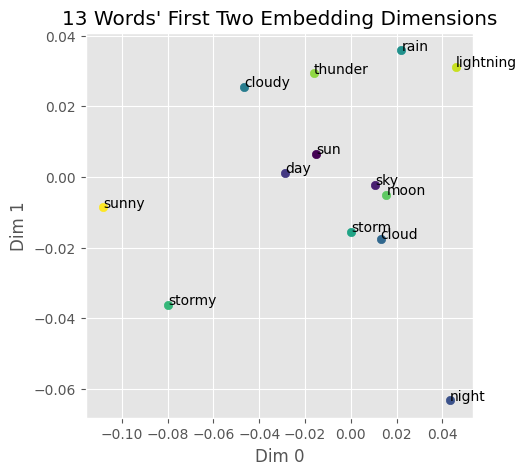

In [ ]:
first_two_embedding_dims = embeddings[:, :, 0:2]
first_two_embedding_dims = first_two_embedding_dims.squeeze().detach().numpy()
num_tokens = first_two_embedding_dims.shape[0]

# initial appearance stuff
fig = plt.figure(figsize=(5, 5))
plt.style.use('ggplot')
ax = fig.add_subplot(111)
colors = np.arange(0, num_tokens, 1)
colors = plt.cm.viridis(np.linspace(0, 1, num_tokens))

# plot for indiviudal token embedding values wrt their dimensions
for i in range(num_tokens):
  plt.scatter(first_two_embedding_dims[i, 0], first_two_embedding_dims[i, 1], label=f"{tokens[i]}", c=[colors[i]])

# additional appearance stuff
for i, txt in enumerate(tokens):
  ax.text(first_two_embedding_dims[i, 0], first_two_embedding_dims[i, 1], txt)

plt.xlabel('Dim 0')
plt.ylabel('Dim 1')
plt.title(f"{num_tokens} Words' First Two Embedding Dimensions")
plt.show()

*Do you notice any patterns?*

Some words like sun/day, storm/cloud, etc... appear close together according to the first and second dimensions. However, words that you would expect to be close like night/day (related concepts describing a time rather than condition of weather) seem to be far apart. Alternatively, you could make the argument that sun/day should be far apart as opposites of time of day. That said, given that there are MANY dimensions to this embedding, the amount of variance captured by two dimensions alone may not be sufficient without some dimensionality reduction method, perhaps explaining some unexpected placement of tokens.

# Problem 1C

In [ ]:
from sklearn.decomposition import PCA
embeddings = embeddings.squeeze().detach().numpy()

Variance explained by first 2 components: [0.1713016  0.10774123]. Total: 0.279


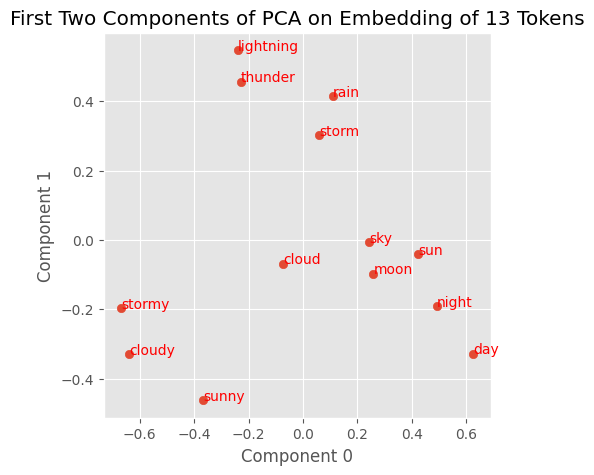

In [ ]:
# 2 principle components
n_components = 2
pca = PCA(n_components=n_components)
pca = pca.fit(embeddings)
explained_variance = pca.explained_variance_
X_pca = pca.transform(embeddings)

print(f"Variance explained by first {n_components} components: {explained_variance}. Total: {sum(explained_variance):.4}")

# initial appearance stuff
fig = plt.figure(figsize=(5, 5))
plt.style.use('ggplot')
ax = fig.add_subplot(111)

plt.scatter(X_pca[:,0], X_pca[:,1])
for i, txt in enumerate(tokens):
  ax.text(X_pca[i, 0], X_pca[i, 1], txt, color='red')

plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title(f"First Two Components of PCA on Embedding of {num_tokens} Tokens")
plt.show()

*Do you notice any patterns?*

It seems that adjectives describing the state of the weather are clustered together (stormy/cloudy/sunny). Additionally, words related to severe weather (lightning/thunder/rain/storm) are in close proximity. Contrary to the previous problem observation, night and day, in addition to sun and sky, which more closely relate to time rather than weather, are clustered in the lower right quadrant of the figure. That is, conceptually close tokens are physically close, when comparing their embeddings passed through a data dimensionality reduction process.

# Problem 1D

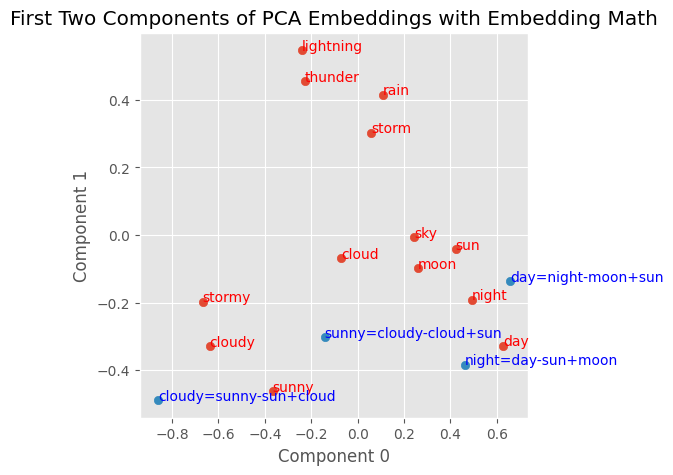

In [ ]:
# extract original indices of interest for tokens
sun_idx = tokens.index('sun')
sunny_idx = tokens.index('sunny')
sky_idx = tokens.index('sky')
cloud_idx = tokens.index('cloud')
cloudy_idx = tokens.index('cloudy')
rain_idx = tokens.index('rain')
moon_idx = tokens.index('moon')
night_idx = tokens.index('night')
day_idx = tokens.index('day')
lightning_idx = tokens.index('lightning')
thunder_idx = tokens.index('thunder')

# retrieve corresponding embedding for embedding math
sun = embeddings[sun_idx, :]
sunny = embeddings[sunny_idx, :]
sky = embeddings[sky_idx, :]
cloud = embeddings[cloud_idx, :]
cloudy = embeddings[cloudy_idx, :]
rain = embeddings[rain_idx, :]
moon = embeddings[moon_idx, :]
night = embeddings[night_idx, :]
day = embeddings[day_idx, :]
lightning = embeddings[lightning_idx, :]
thunder = embeddings[thunder_idx, :]

# embedding math
day_analogy = night - moon + sun #= day
night_analogy = day - sun + moon #= night
cloudy_analogy = sunny - sun + cloud
sunny_analogy = cloudy - cloud + sun


# apply pca on the embedding math
embedding_math_pca = pca.transform([day_analogy, night_analogy, cloudy_analogy, sunny_analogy])

# initial appearance stuff
fig = plt.figure(figsize=(5, 5))
plt.style.use('ggplot')
ax = fig.add_subplot(111)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.scatter(embedding_math_pca[:,0], embedding_math_pca[:,1])
for i, txt in enumerate(tokens):
  ax.text(X_pca[i, 0], X_pca[i, 1], txt, color='red')

for i, txt in enumerate(['day=night-moon+sun', 'night=day-sun+moon', 'cloudy=sunny-sun+cloud', 'sunny=cloudy-cloud+sun']):
  ax.text(embedding_math_pca[i, 0], embedding_math_pca[i, 1], txt, color='blue', label = 'with embedding math')

plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.title(f"First Two Components of PCA Embeddings with Embedding Math")
plt.show()

Generally speaking, it seems we can add and subtract embeddings corresponding to certain tokens to approximate some concept. For time of day, we can closely approximate day as a combination of night-moon+sun, and night as day-sun+moon. For weather, this relationship seems a little less strong based on the greater distance between ground truth and the embedding math version of the concept (though who knows, as we only use two components in PCA). Nevertheless, we can roughly approximate cloudy as sunny-sun+cloud, and sunny as cloudy-cloud+sun.

# Problem 2A

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [ ]:
# load model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased', output_attentions=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
# our text input to pass into the model
input_text = "I do not like green eggs and ham"
tokens = tokenizer.tokenize(input_text)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor([ids])

In [ ]:
# Inspect the bert model
base_model = model.base_model
print(base_model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

torch.Size([1, 12, 8, 8])


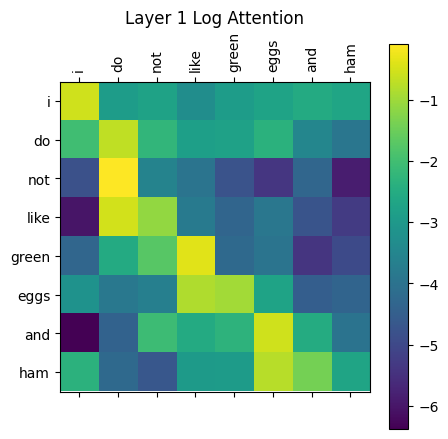

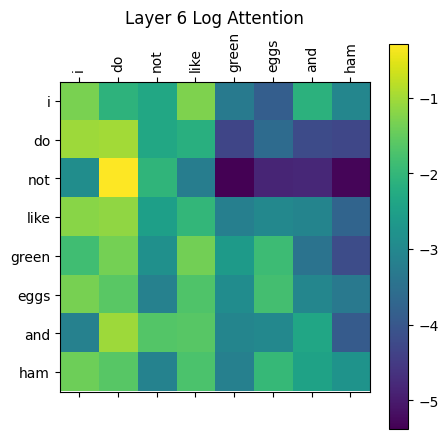

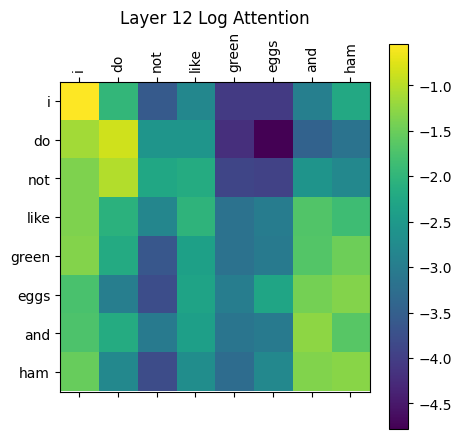

In [ ]:
with torch.no_grad():
  out = model(input_ids)
  attentions = out.attentions

def plot_attention(attention, tokens, layer_num):
  # log(attention + nonzero term)
  epsilon = 1e-9 # avoid log(0)
  attention = np.log(attention + epsilon) # apply log for enhancing visibility of differences of activation after softmax

  # figure specs
  fig, ax = plt.subplots(figsize=(5, 5))
  cax = ax.matshow(attention)
  ax.set_xticks(np.arange(len(tokens)))
  ax.set_yticks(np.arange(len(tokens)))
  ax.set_xticklabels(tokens, rotation=90)
  ax.set_yticklabels(tokens)
  cbar = fig.colorbar(cax, ax=ax)
  ax.set_title(f"Layer {layer_num} Log Attention")
  plt.show()

head = 3

print(attentions[0].shape)

# plotting of layers
layer = 0
attention = attentions[layer][0][head].numpy()
plot_attention(attention, tokens, layer + 1)

layer = 5
attention = attentions[layer][0][head].numpy()
plot_attention(attention, tokens, layer + 1)

layer = 11
attention = attentions[layer][0][head].numpy()
plot_attention(attention, tokens, layer + 1)

In the first attention layer of 3rd head of the Bert model, it appears that there is a high level of activation along the diagonal. That is, it seems that it strongly focuses on local context here, and the relation of tokens to their neighbors (e.g. do + not + like AND eggs + and + ham).  Interestingly, there is extremely low activation for words that when put together would completely change the meaning of the sentence (e.g. i + like has low activation, which differs drastically from the original meaning of i + do + not + like).

The later layers don't follow such a diagonal pattern in terms of activation. Though this is a little bit more abstract and hard to interpret, I would guess that it seems to be capturing longer term relationships in the sequence of tokens with activations that seem more vertically uniform. If you look across the different layers, its possible that it seems to pick up on the importance of the negation in the sentence, as there is consitently high activation with "do + not". Generally, I would refrain from making any concrete claims about this, as its hard to truly know what is going on in the later layers.

# Problem 2B

In [ ]:
from transformers import MarianMTModel, MarianTokenizer
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the pretrained model
model_name = 'Helsinki-NLP/opus-mt-en-fr'
model = MarianMTModel.from_pretrained(model_name, output_attentions=True, return_dict_in_generate=True)
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = model.eval()

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
# our text input to pass into the model
english_text = "Thou shalt not make a machine in the likeness of a human mind."
english_tokens = tokenizer(english_text, return_tensors="pt", padding=True, truncation=True)

In [ ]:
# Take our english version and translate it to text
with torch.no_grad():
  out = model.generate(input_ids=english_tokens['input_ids'], output_attentions=True)
  translated_ids = out.sequences
  translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens=True)

input_ids = english_tokens['input_ids']
decoder_input_ids = translated_ids

# Now use the translated tokens (from target language) for cross-attention against the english version
with torch.no_grad():
  out = model.generate(input_ids=input_ids, decoder_input_ids=decoder_input_ids, output_attentions=True)
  attentions = out.cross_attentions

In [ ]:
# extract original text of tokens from ids
original_en_token_strings = tokenizer.convert_ids_to_tokens(english_tokens['input_ids'].squeeze().tolist())
original_fr_token_strings = tokenizer.convert_ids_to_tokens(translated_ids[0])
print("English tokens: ", original_en_token_strings)
print("French tokens: ", original_fr_token_strings)

English tokens:  ['▁Thou', '▁shal', 't', '▁not', '▁make', '▁a', '▁machine', '▁in', '▁the', '▁like', 'ness', '▁of', '▁a', '▁human', '▁mind', '.', '</s>']
French tokens:  ['<pad>', '▁Tu', '▁ne', '▁fera', 's', '▁pas', '▁une', '▁machine', '▁à', '▁la', '▁ressemblance', '▁d', "'", 'un', '▁esprit', '▁humain', '.', '</s>']


In [ ]:
stack_layer_idx = 0
decoder_layer_idx = 0
batch_idx = 0
head_idx = 0

# Extract the attention tensor
layer_cross_attentions0 = attentions[stack_layer_idx]
attention_tensor0 = layer_cross_attentions0[decoder_layer_idx]

# Extract specific attention weights
attention_weights0 = attention_tensor0[batch_idx, head_idx].detach().cpu().numpy()

# Visualize or analyze the attention weights
print("Attention Weights Shape:", attention_weights0.shape)

Attention Weights Shape: (18, 17)


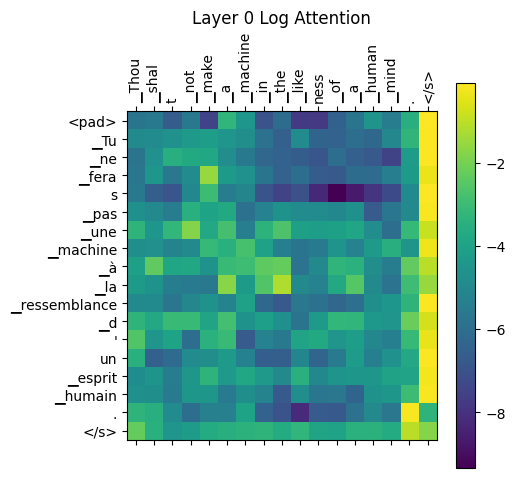

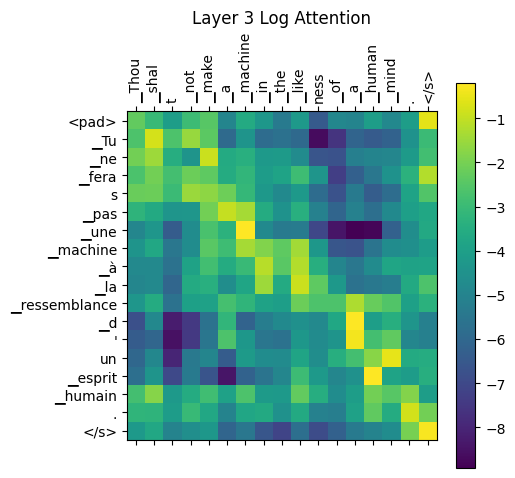

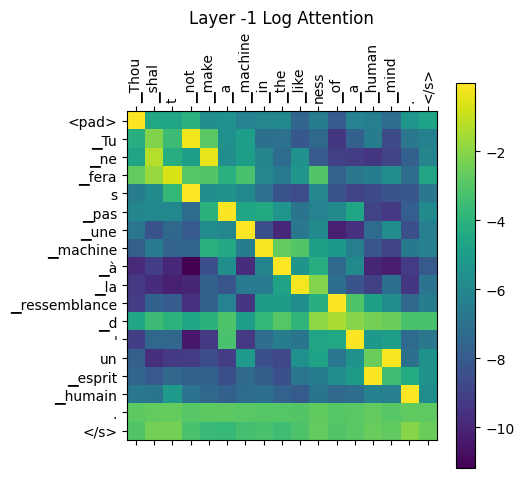

In [ ]:
def plot_attention(attention, source_tokens, target_tokens, layer_num):
  # log(attention + nonzero term)
  epsilon = 1e-9 # avoid log(0)
  attention = np.log(attention + epsilon) # apply log for enhancing visibility of differences of activation after softmax

  # figure specs
  fig, ax = plt.subplots(figsize=(5, 5))
  cax = ax.matshow(attention)
  ax.set_xticks(np.arange(len(source_tokens)))
  ax.set_yticks(np.arange(len(target_tokens)))
  ax.set_xticklabels(source_tokens, rotation=90)
  ax.set_yticklabels(target_tokens)
  cbar = fig.colorbar(cax, ax=ax)
  ax.set_title(f"Layer {layer_num} Log Attention")
  plt.show()

plot_attention(attention_weights0, original_en_token_strings, original_fr_token_strings, layer_num=0)

# also for the last layer
stack_layer_idx = 0
decoder_layer_idx = 3
batch_idx = 0
head_idx = 0

layer_cross_attentions = attentions[stack_layer_idx]
attention_tensor = layer_cross_attentions[decoder_layer_idx]
attention_weights_last = attention_tensor[batch_idx, head_idx].detach().cpu().numpy()
plot_attention(attention_weights_last, original_en_token_strings, original_fr_token_strings, layer_num=decoder_layer_idx)

# also for the last layer
stack_layer_idx = 0
decoder_layer_idx = -1
batch_idx = 0
head_idx = 0

layer_cross_attentions = attentions[stack_layer_idx]
attention_tensor = layer_cross_attentions[decoder_layer_idx]
attention_weights_last = attention_tensor[batch_idx, head_idx].detach().cpu().numpy()
plot_attention(attention_weights_last, original_en_token_strings, original_fr_token_strings, layer_num=decoder_layer_idx)

In the initial cross attention layer of the model, the diagonal relationship between english and french words in terms of activations is not super clear for every word pair. Though, it is still apparent for words like "make", "the", "a", and their French counterparts.

As you progress deeper into the model, this relationship becomes more apparent where there is a more direct one-to-one relationship between english words and the french equivalent (there seems to be a strange offset by 1 in the later layers that I couldn't resolve that is perhaps related to differences in special tokens in the original/translated text). Lastly, in cases where word order changes between languages, so do the activations in a corresponding manner (e.g. esprit/humain vs. human/mind).

# Problem 3A

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from torch.nn import Module, Linear, ReLU, Sequential, Dropout

In [ ]:
# Large network approach
class LargeNet(Module):
  def __init__(self, inshape=(28, 28), num_classes=10):
    super(LargeNet, self).__init__()
    self.inshape = inshape
    input_size = self.inshape[0] * self.inshape[1]
    self.drop_layer = Dropout(p=0.2)
    self.fc1 = self.largeLayer(input_size, 512)
    self.fc2 = self.largeLayer(512, 512)
    self.fc3 = self.largeLayer(512, 512)
    self.fc4 = self.largeLayer(512, 512)
    self.linear = Linear(512, num_classes)

  def largeLayer(self, in_channels, out_channels):
    layer = Sequential(
        Linear(in_channels, out_channels),
        ReLU(),
    )
    return layer

  def forward(self, x):
    x = x.view(-1, self.inshape[0] * self.inshape[1])
    x = self.fc1(x)
    x = self.drop_layer(x)
    x = self.fc2(x)
    x = self.drop_layer(x)
    x = self.fc3(x)
    x = self.drop_layer(x)
    x = self.fc4(x)
    x = self.drop_layer(x)
    x = self.linear(x)
    return x

largeModel = LargeNet()
num_params_largeModel = sum(p.numel() for p in largeModel.parameters())
print("Large model number of parameters: ", num_params_largeModel)

Large model number of parameters:  1195018


In [ ]:
# Low Rank approach
class LoRaNet(Module):
  def __init__(self, inshape=(28, 28), num_classes=10):
    super(LoRaNet, self).__init__()
    self.inshape = inshape
    input_size = self.inshape[0] * self.inshape[1]
    self.drop_layer = Dropout(p=0.2)
    self.fc1 = self.loraLayer(input_size, 512)
    self.fc2 = self.loraLayer(512, 512)
    self.fc3 = self.loraLayer(512, 512)
    self.fc4 = self.loraLayer(512, 512)
    self.linear = Linear(512, num_classes)

  def loraLayer(self, in_channels, out_channels):
    layer = Sequential(
        Linear(in_channels, 100),
        Linear(100, out_channels),
        ReLU(),
    )
    return layer

  def forward(self, x):
    x = x.view(-1, self.inshape[0] * self.inshape[1])
    x = self.fc1(x)
    x = self.drop_layer(x)
    x = self.fc2(x)
    x = self.drop_layer(x)
    x = self.fc3(x)
    x = self.drop_layer(x)
    x = self.fc4(x)
    x = self.drop_layer(x)
    x = self.linear(x)
    return x

loraModel = LoRaNet()
num_params_loraModel = sum(p.numel() for p in loraModel.parameters())
print("LoRa model number of parameters: ", num_params_loraModel)

LoRa model number of parameters:  444378


# Problem 3B

In [ ]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [ ]:
def train_loop(
    dataset,
    model,
    loss_fn,
    optimizer_cls,
    device,
    n_epochs=10,
    train_split=0.8,
    batch_size=64,
    learning_rate=1e-3,
    random_seed=None
):
    train_losses = []
    test_losses = []

    # seed for reproducible
    if random_seed:
        torch.manual_seed(random_seed)
        np.random.seed(random_seed)

    # Device
    device = torch.device(device)
    model.to(device)

    # Dataset split
    train_size = int(train_split * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

    # DataLoader
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Optim
    optimizer = optimizer_cls(model.parameters(), lr=learning_rate)

    # Timing
    start_time = time.time()

    for epoch in range(n_epochs):
        train_loss = 0
        test_loss = 0

        # Train mode
        model.train()
        for X, y in tqdm(train_dataloader, desc=f"Epoch {epoch+1} Training"):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        # calculate train loss
        train_loss /= len(train_dataloader)
        train_losses.append(train_loss)

        # Test evaluation
        model.eval()
        with torch.no_grad():
            for X, y in tqdm(test_dataloader, desc=f"Epoch {epoch+1} Testing"):
                X, y = X.to(device), y.to(device)
                pred = model(X)
                loss = loss_fn(pred, y)
                test_loss += loss.item()

        # calculate test loss
        test_loss /= len(test_dataloader)
        test_losses.append(test_loss)

        print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Test Loss = {test_loss:.4f}")

    # Timing
    total_time = time.time() - start_time
    print(f"Training completed in {total_time:.2f}s ({total_time / n_epochs:.2f}s/epoch)")

    return train_losses, test_losses, total_time

In [ ]:
# Using the MNIST dataset
dataset = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

Using downloaded and verified file: data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.28MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.02MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device}...')

Using cpu...


In [ ]:
n_epochs = 10
loss_fn = CrossEntropyLoss()
largeModel = LargeNet()
optimizer = Adam

train_losses_large, test_losses_large, total_time = train_loop(dataset, largeModel, loss_fn, optimizer, device, n_epochs=n_epochs)

Epoch 1 Testing: 100%|██████████| 188/188 [00:02<00:00, 75.75it/s]


Epoch 1: Train Loss = 0.3079, Test Loss = 0.1426


Epoch 2 Testing: 100%|██████████| 188/188 [00:02<00:00, 67.99it/s]


Epoch 2: Train Loss = 0.1360, Test Loss = 0.1234


Epoch 3 Testing: 100%|██████████| 188/188 [00:02<00:00, 68.01it/s]


Epoch 3: Train Loss = 0.1079, Test Loss = 0.1162


Epoch 4 Testing: 100%|██████████| 188/188 [00:02<00:00, 73.97it/s]


Epoch 4: Train Loss = 0.0884, Test Loss = 0.1105


Epoch 5 Testing: 100%|██████████| 188/188 [00:03<00:00, 57.80it/s]


Epoch 5: Train Loss = 0.0778, Test Loss = 0.0908


Epoch 6 Testing: 100%|██████████| 188/188 [00:02<00:00, 75.16it/s]


Epoch 6: Train Loss = 0.0675, Test Loss = 0.0936


Epoch 7 Testing: 100%|██████████| 188/188 [00:02<00:00, 69.85it/s]


Epoch 7: Train Loss = 0.0619, Test Loss = 0.1102


Epoch 8 Testing: 100%|██████████| 188/188 [00:02<00:00, 73.86it/s]


Epoch 8: Train Loss = 0.0575, Test Loss = 0.1043


Epoch 9 Testing: 100%|██████████| 188/188 [00:02<00:00, 72.61it/s]


Epoch 9: Train Loss = 0.0495, Test Loss = 0.1000


Epoch 10 Testing: 100%|██████████| 188/188 [00:02<00:00, 75.79it/s]

Epoch 10: Train Loss = 0.0498, Test Loss = 0.0954
Training completed in 323.90s (32.39s/epoch)


In [ ]:
n_epochs = 10
loss_fn = CrossEntropyLoss()
loraModel = LoRaNet()
optimizer = Adam

lora_train_losses, lora_test_losses, lora_total_time = train_loop(dataset, loraModel, loss_fn, optimizer, device, n_epochs=n_epochs)

Epoch 1 Testing: 100%|██████████| 188/188 [00:01<00:00, 94.29it/s]


Epoch 1: Train Loss = 0.4752, Test Loss = 0.2192


Epoch 2 Testing: 100%|██████████| 188/188 [00:02<00:00, 92.44it/s]


Epoch 2: Train Loss = 0.2141, Test Loss = 0.1691


Epoch 3 Testing: 100%|██████████| 188/188 [00:02<00:00, 91.52it/s]


Epoch 3: Train Loss = 0.1729, Test Loss = 0.2194


Epoch 4 Testing: 100%|██████████| 188/188 [00:02<00:00, 64.51it/s]


Epoch 4: Train Loss = 0.1556, Test Loss = 0.1723


Epoch 5 Testing: 100%|██████████| 188/188 [00:02<00:00, 92.81it/s]


Epoch 5: Train Loss = 0.1373, Test Loss = 0.1653


Epoch 6 Testing: 100%|██████████| 188/188 [00:02<00:00, 75.20it/s]


Epoch 6: Train Loss = 0.1339, Test Loss = 0.1294


Epoch 7 Testing: 100%|██████████| 188/188 [00:02<00:00, 90.74it/s]


Epoch 7: Train Loss = 0.1206, Test Loss = 0.1335


Epoch 8 Testing: 100%|██████████| 188/188 [00:02<00:00, 91.08it/s]


Epoch 8: Train Loss = 0.1043, Test Loss = 0.1295


Epoch 9 Testing: 100%|██████████| 188/188 [00:02<00:00, 77.46it/s]


Epoch 9: Train Loss = 0.1073, Test Loss = 0.1318


Epoch 10 Testing: 100%|██████████| 188/188 [00:02<00:00, 91.71it/s]

Epoch 10: Train Loss = 0.1078, Test Loss = 0.1351
Training completed in 190.55s (19.05s/epoch)


In [ ]:
# Compare the training time and number of parameters of the low rank adaptation approach and the large model
print(f"Large Model training time: {total_time:.2f}s")
print(f"Number of parameters in Large Model: {num_params_largeModel}")
print("\n")
print(f"LoRa Model training time: {lora_total_time:.2f}s")
print(f"Number of parameters in LoRa Model: {num_params_loraModel}")

Large Model training time: 323.90s
Number of parameters in Large Model: 1195018


LoRa Model training time: 190.55s
Number of parameters in LoRa Model: 444378


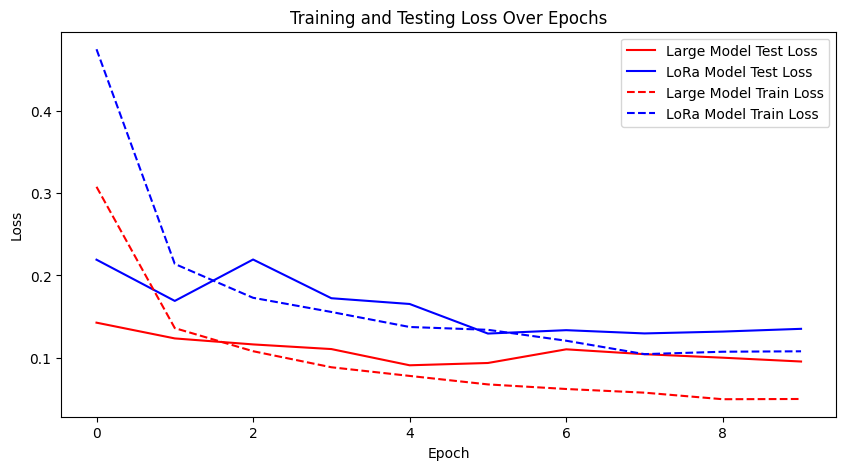

In [ ]:
# Visualize the test loss comparing the low rank adaptation and the large model
plt.figure(figsize=(10, 5))

plt.plot(test_losses_large, label='Large Model Test Loss', c='red')
plt.plot(lora_test_losses, label='LoRa Model Test Loss', c='blue')

plt.plot(train_losses_large, label='Large Model Train Loss', c='red', linestyle='dashed')
plt.plot(lora_train_losses, label='LoRa Model Train Loss', c='blue', linestyle='dashed')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.title('Training and Testing Loss Over Epochs')
plt.legend()

plt.show()

# Problem 4A

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import binom

In [ ]:
# tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

def autoregressive_generate(model,
                          tokenizer,
                          text: str,
                          num_tokens: int = 10,
                          temperature: float = 1.0,
                          top_k = 50,
                          ):
  # get input, output ids, and text
  input_ids = tokenizer.encode(text, return_tensors="pt")
  output_ids = model.generate(
      input_ids,
      max_length=input_ids.shape[1] + num_tokens,
      do_sample=True,
      pad_token_id=tokenizer.eos_token_id,
      temperature=temperature,
      top_k=top_k
  )
  text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
  return text

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
input_text = "I do not like green eggs and ham"
generated = autoregressive_generate(model, tokenizer, input_text, num_tokens=100)
print(generated)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


I do not like green eggs and ham toasted, as I do not like the taste of garlic, onion or jalapeños. I like garlic, jalapeno peppers and sautéed onions. But if I can find red chilies, I will put them into some chowder to make my Red Velvet.


# Problem 4B

In [ ]:
# For my demonstration, I will decrease the probability of the red words
# and increase the probability for the green words
seed = 42
VOCAB_SIZE = 50257 # this number was chosen given the logits size at the output of gpt2
random.seed(seed)
all_indices = list(range(VOCAB_SIZE))
random.shuffle(all_indices)
RED_INDICES = all_indices[:int(VOCAB_SIZE/2)]
GREEN_INDICES = all_indices[int(VOCAB_SIZE/2):VOCAB_SIZE]

In [ ]:
def redgreen_watermark(logits: torch.Tensor,
                       green_indices: list,
                       red_indices: list,
                       delta: float):

  # we have logits* = delta x watermark_tensor + logits
  watermark_tensor = torch.zeros_like(logits)
  watermark_tensor[:, green_indices] = 1
  watermark_tensor[:, red_indices] = -1
  watermark_tensor *= delta
  logits = logits + watermark_tensor
  return logits

In [ ]:
def autoregressive_redgreen_generate(model,
                                     tokenizer,
                                     text: str,
                                     num_tokens: int = 10,
                                     temperature: float = 1.0,
                                     top_k = 50,
                                     delta = 0.0,
                                     red_indices = RED_INDICES,
                                     green_indices = GREEN_INDICES):
  # tokenize input to ids
  input_ids = tokenizer.encode(text, return_tensors="pt")
  generated_ids = input_ids[0].tolist()

  for i in range(num_tokens):
      #Generate 1 token at a time and get the logits from it
      outputs = model.generate(
          input_ids,
          max_length=input_ids.shape[1] + 1,
          do_sample=True,
          pad_token_id=tokenizer.eos_token_id,
          output_scores=True,
          return_dict_in_generate=True
      )

      # our logits from the scores are modified slightly with our green/black
      # word watermarking procedure by a factor of delta
      # red is shifted to less likely, green more likely
      logits = outputs.scores[-1]
      logits = redgreen_watermark(logits, green_indices, red_indices, delta)

      # Convert logits to probabilities and perform sampling
      probs = F.softmax(logits / temperature, dim=-1)
      next_token = torch.multinomial(probs, num_samples=1).item()

      # Append next token to generated sequence, and update input ids for next pass
      generated_ids.append(next_token)
      input_ids = torch.cat([input_ids, torch.tensor([[next_token]])], dim=1)

  # Decode final text output
  watermarked_text = tokenizer.decode(generated_ids, skip_special_tokens=True)
  return watermarked_text

In [ ]:
input_text = "I do not like green eggs and ham"
watermarked_generated = autoregressive_redgreen_generate(model, tokenizer, input_text, num_tokens=100, delta=0.6)
print(watermarked_generated)

I do not like green eggs and ham, but I like them for dessert and salads."

When the mother-in-law asked how he would feel if she got married to a guy he was not sure about, he said, "It was my mother, her husband, who was the devil."Mixed martial arts is no longer about fighting, but about winning. A recent article by Riki Maki, 'UFC's Head Combat Coach' explains how a mixed martial art fighter is no longer merely another fighter that's


In [ ]:
def detect_redgreen_watermark(text: str,
                              tokenizer,
                              red_indices,
                              green_indices,
                              model,
                              vocab_size = VOCAB_SIZE,
                              verbose = True):
  # tokenize input to ids
  input_ids = tokenizer.encode(text, return_tensors="pt")
  red_count = 0
  green_count = 0

  # Calculate number of red and green words in input
  for token_id in input_ids[0]:
    if token_id in red_indices:
        red_count += 1
    elif token_id in green_indices:
        green_count += 1

  total_count = green_count + red_count
  p_green = len(green_indices) / vocab_size
  p_red = len(red_indices) / vocab_size

  # Calculate the probability of observing k or more green words
  probability_green = 1 - binom.cdf(green_count-1, total_count, p_green)

  # Setting for if I want it to be descriptive to me
  if verbose:
    print(f"Red words: {red_count}")
    print(f"Green words: {green_count}")
    print(f"Total words: {total_count}")
    print(f"Probability of observing {green_count} or more green words out of {red_count + green_count} words: {probability_green}")

  return probability_green, total_count, red_count, green_count

In [ ]:
probability_green, total_count, red_count, green_count = detect_redgreen_watermark(watermarked_generated, tokenizer, RED_INDICES, GREEN_INDICES, model)

Red words: 30
Green words: 77
Total words: 107
Probability of observing 77 or more green words out of 107 words: 3.1418138697336673e-06


# Problem 4C

In [ ]:
def autoregressive_exp_min_samp_generate(model,
                                        tokenizer,
                                        text: str,
                                        num_tokens: int = 10,
                                        temperature: float = 1.0,
                                        top_k = 50,
                                        seed_length = 4,):

  # tokenize input to ids
  input_ids = tokenizer.encode(text, return_tensors="pt")
  generated_ids = input_ids[0].tolist()
  generated_text = ""

  for i in range(num_tokens):
    # Generate 1 token at a time and get the logits from it
      outputs = model.generate(
          input_ids,
          max_length=input_ids.shape[1] + 1,
          do_sample=True,
          pad_token_id=tokenizer.eos_token_id,
          temperature=temperature,
          top_k=top_k,
          output_scores=True,
          return_dict_in_generate=True
      )

      # generate probabilities and
      logits = outputs.scores[-1]
      probs = F.softmax(logits/temperature, dim=-1)

      # seeding for next word as sum of previous words
      seed_tokens = generated_ids[-seed_length:]
      np.random.seed(sum(seed_tokens))
      uniform_samples = np.random.uniform(0, 1, len(probs[0]))
      epsilon = 1e-10
      scores = -np.log(uniform_samples) / (probs + epsilon) # avoid zero div
      next_token = np.argmin(scores)
      xi = uniform_samples[next_token]
      generated_ids.append(next_token)
      input_ids = torch.cat([input_ids, torch.tensor([[next_token]])], dim=1)
      generated_text += tokenizer.decode(next_token, skip_special_tokens=True)

  # Decode final text output
  all_text = tokenizer.decode(generated_ids, skip_special_tokens=True)
  return all_text, generated_text

In [ ]:
all_text, generated_text = autoregressive_exp_min_samp_generate(model, tokenizer, input_text, num_tokens=100, seed_length=4)
print(all_text)
print(generated_text)

I do not like green eggs and ham and I find it strange, especially when you're not allowed to eat them yourself," she says. "Having children was actually worse, for you. Even if we knew what we were doing, which seems weird, I don't think I would be saying I wouldn't do it."From the very beginning, people of the old Soviet Union thought that there might be something for them in the future. In other words, there might be an opportunity here.

That will be no secret.
 and I find it strange, especially when you're not allowed to eat them yourself," she says. "Having children was actually worse, for you. Even if we knew what we were doing, which seems weird, I don't think I would be saying I wouldn't do it."From the very beginning, people of the old Soviet Union thought that there might be something for them in the future. In other words, there might be an opportunity here.

That will be no secret.


In [ ]:
def detect_exp_min_samp_watermark(text: str,
                                  tokenizer,
                                  model,
                                  seed_length: int = 4,
                                  temperature: float = 1.0,
                                  top_k = 50,
                                  verbose: bool = True):
    # Tokenize input text
    input_ids = tokenizer.encode(text, return_tensors="pt")
    tokens = input_ids[0].tolist()
    total_cost = 0

    for i in range(seed_length, len(tokens)):
        # Extract the seed tokens
        seed_tokens = tokens[i - seed_length:i]

        # Get the model's logits for the current token
        outputs = model.generate(
          input_ids,
          max_length=input_ids.shape[1] + 1,
          do_sample=True,
          pad_token_id=tokenizer.eos_token_id,
          temperature=temperature,
          top_k=top_k,
          output_scores=True,
          return_dict_in_generate=True
        )

        # generate probabilities and
        logits = outputs.scores[-1]
        probs = F.softmax(logits / temperature, dim=-1)

        # Seed the random generator based on the seed tokens
        np.random.seed(sum(seed_tokens))
        uniform_samples = np.random.uniform(0, 1, len(probs[0]))

        # Compute cost for the next token
        next_token = tokens[i]
        xi = uniform_samples[next_token]
        total_cost += -np.log(xi) / len(tokens)

    # Final detection logic
    if verbose:
        print(f"Total cost: {total_cost:.6f}")

    return total_cost

results = detect_exp_min_samp_watermark(
    tokenizer=tokenizer,
    text=" green eggs and ham" + generated_text, # add the initial 4 words that start the seed
    model=model,
    seed_length=4,
    temperature=1.0
)

Total cost: 0.264049


# Problem 4D

In [ ]:
prompt0 = "I do not like green eggs and ham"
prompt1 = "By the time it became self aware"
complex_prompt2 = "Indubitably, the exquisite nature of math"

In [ ]:
# without watermarking
generated0_no_watermark = autoregressive_generate(model, tokenizer, prompt0, num_tokens=100)
generated1_no_watermark = autoregressive_generate(model, tokenizer, prompt1, num_tokens=100)
generated2_no_watermark = autoregressive_generate(model, tokenizer, complex_prompt2, num_tokens=100)

In [ ]:
# redgreen watermarking
generated0_redgreen = autoregressive_redgreen_generate(model, tokenizer, prompt0, num_tokens=100, delta=0.6)
generated1_redgreen = autoregressive_redgreen_generate(model, tokenizer, prompt1, num_tokens=100, delta=0.6)
generated2_redgreen = autoregressive_redgreen_generate(model, tokenizer, complex_prompt2, num_tokens=100, delta=0.6)

In [ ]:
# exp min sampling watermarking
generated0_exp_min_samp = autoregressive_exp_min_samp_generate(model, tokenizer, prompt0, num_tokens=100)
generated1_exp_min_samp = autoregressive_exp_min_samp_generate(model, tokenizer, prompt1, num_tokens=100)
generated2_exp_min_samp = autoregressive_exp_min_samp_generate(model, tokenizer, complex_prompt2, num_tokens=100)

In [ ]:
generated0_no_watermark_redgreen = detect_redgreen_watermark(generated0_no_watermark, tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated0_no_watermark_exp_min_samp = detect_exp_min_samp_watermark(" green eggs and ham" + generated0_no_watermark, tokenizer, model, verbose=False)

print(generated0_no_watermark)
print("\nDetection with no watermark generated text:")
print(f"\t REDGREEN: Probability of observing {generated0_no_watermark_redgreen[3]} or more green words out of {generated0_no_watermark_redgreen[1]} words: {generated0_no_watermark_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated0_no_watermark_exp_min_samp:.6f}")

I do not like green eggs and ham (batteries are fine but those can get stuck and cause you to die) so this recipe for ham needs a whole new world. I started this low carb ham recipe just in time for the holiday season.

5 / 5 ( 19 Reviews Did you Make This Recipe? Leave a review » Low-Carb Ham Slices Prep Time 20 minutes Total Time 25 minutes Servings 16 Calories 0 kcal Author Ann R. Ingredients 7 1/4 cups all purpose flour

3/

Detection with no watermark generated text:
	 REDGREEN: Probability of observing 53 or more green words out of 108 words: 0.6135850438039057
	 EXP_MIN_SAMP: Total cost: 1.145703


In [ ]:
generated0_redgreen_redgreen = detect_redgreen_watermark(generated0_redgreen, tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated0_redgreen_exp_min_samp = detect_exp_min_samp_watermark(" green eggs and ham" + generated0_redgreen, tokenizer, model, verbose=False)

print(generated0_redgreen)
print("\nDetection with reg/green generated text:")
print(f"\t REDGREEN: Probability of observing {generated0_redgreen_redgreen[3]} or more green words out of {generated0_redgreen_redgreen[1]} words: {generated0_redgreen_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated0_redgreen_exp_min_samp:.6f}")

I do not like green eggs and ham is good for me," he said. "I think it is good for us."

Inequality is on the rise here -- more than 15 per cent of America's wealth -- thanks to a rise in corporate income. In the mid-1990s, only three-quarters of households owned more than 100 percent of all public stock.

"It's like in every other state that taxes it's just going to grow more slowly, it'll continue to grow, but it's going

Detection with reg/green generated text:
	 REDGREEN: Probability of observing 79 or more green words out of 108 words: 7.992850996618728e-07
	 EXP_MIN_SAMP: Total cost: 0.907890


In [ ]:
generated0_exp_min_samp_redgreen = detect_redgreen_watermark(generated0_exp_min_samp[0], tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated0_exp_min_samp_exp_min_samp = detect_exp_min_samp_watermark(" green eggs and ham" + generated0_exp_min_samp[1], tokenizer, model, verbose=False)

print(generated0_exp_min_samp[0])
print("\nDetection with exp_min_sampling generated text:")
print(f"\t REDGREEN: Probability of observing {generated0_exp_min_samp_redgreen[3]} or more green words out of {generated0_exp_min_samp_redgreen[1]} words: {generated0_exp_min_samp_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated0_exp_min_samp_exp_min_samp:.6f}")

I do not like green eggs and ham and I find it strange, especially when you're not allowed to eat them yourself," she says. "Having children was actually worse, for you. Even if we knew what we were doing, which seems weird, I don't think I would be saying I wouldn't do it."From the very beginning, people of the old Soviet Union thought that there might be something for them in the future. In other words, there might be an opportunity here.

That will be no secret.

Detection with exp_min_sampling generated text:
	 REDGREEN: Probability of observing 54 or more green words out of 107 words: 0.5000823038370968
	 EXP_MIN_SAMP: Total cost: 0.264049


In [ ]:
generated1_no_watermark_redgreen = detect_redgreen_watermark(generated1_no_watermark, tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated1_no_watermark_exp_min_samp = detect_exp_min_samp_watermark(" it became self aware" + generated1_no_watermark, tokenizer, model, verbose=False)

print(generated1_no_watermark)
print("\nDetection with no watermark generated text:")
print(f"\t REDGREEN: Probability of observing {generated1_no_watermark_redgreen[3]} or more green words out of {generated1_no_watermark_redgreen[1]} words: {generated1_no_watermark_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated1_no_watermark_exp_min_samp:.6f}")

By the time it became self aware I was probably 14-16. I remember thinking: No, I'm not going to put a knife in you anymore. I don't want to. No. I want to let you go. You see, what's that? This thing, this horrible thing I've told myself I can do, that shit, that stuff, you could be the first guy in the world to tell me not to buy this shit. OK? OK? OK?

I remember that feeling that I really

Detection with no watermark generated text:
	 REDGREEN: Probability of observing 57 or more green words out of 107 words: 0.28111590114102913
	 EXP_MIN_SAMP: Total cost: 0.936318


In [ ]:
generated1_redgreen_redgreen = detect_redgreen_watermark(generated1_redgreen, tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated1_redgreen_exp_min_samp = detect_exp_min_samp_watermark(" it became self aware" + generated1_redgreen, tokenizer, model, verbose=False)

print(generated1_redgreen)
print("\nDetection with reg/green generated text:")
print(f"\t REDGREEN: Probability of observing {generated1_redgreen_redgreen[3]} or more green words out of {generated1_redgreen_redgreen[1]} words: {generated1_redgreen_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated1_redgreen_exp_min_samp:.6f}")

By the time it became self aware, it could easily have been made public. In fact, after much thought, it appeared to him that this was not really a known story, but merely an obscure rumor, invented out of ignorance. That was a fact, but it only had to do with a report from one of his friends. The two men exchanged a look, and the story began to circulate. In that instant, one of them could say for sure that the article was false, and that another man, who had a lot

Detection with reg/green generated text:
	 REDGREEN: Probability of observing 77 or more green words out of 107 words: 3.1418138697336673e-06
	 EXP_MIN_SAMP: Total cost: 0.870166


In [ ]:
generated1_exp_min_samp_redgreen = detect_redgreen_watermark(generated1_exp_min_samp[0], tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated1_exp_min_samp_exp_min_samp = detect_exp_min_samp_watermark(" it became self aware" + generated1_exp_min_samp[1], tokenizer, model, verbose=False)

print(generated1_exp_min_samp[0])
print("\nDetection with exp_min_sampling generated text:")
print(f"\t REDGREEN: Probability of observing {generated1_exp_min_samp_redgreen[3]} or more green words out of {generated1_exp_min_samp_redgreen[1]} words: {generated1_exp_min_samp_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated1_exp_min_samp_exp_min_samp:.6f}")

By the time it became self aware of what was going on with the state of affairs in Arkansas, we didn't know anything was amiss.

This made us rethink the whole issue of whether government was playing any role in this. I remember that conversation in the news media. I think we all knew what that means.

It sounded more like an excuse for people to have to look at this thing rather than go, "Hey, that's what you're doing."

Well, for those of you who aren

Detection with exp_min_sampling generated text:
	 REDGREEN: Probability of observing 54 or more green words out of 107 words: 0.5000823038370968
	 EXP_MIN_SAMP: Total cost: 0.161419


In [ ]:
generated2_no_watermark_redgreen = detect_redgreen_watermark(generated2_no_watermark, tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated2_no_watermark_exp_min_samp = detect_exp_min_samp_watermark(" exquisite nature of math" + generated2_no_watermark, tokenizer, model, verbose=False)

print(generated2_no_watermark)
print("\nDetection with no watermark generated text:")
print(f"\t REDGREEN: Probability of observing {generated2_no_watermark_redgreen[3]} or more green words out of {generated2_no_watermark_redgreen[1]} words: {generated2_no_watermark_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated2_no_watermark_exp_min_samp:.6f}")

Indubitably, the exquisite nature of math is the case here—for instance, a simple equation that takes one factor of energy (a fraction of which must decay in order to reach new heights) could do the trick. Indeed, some mathematicians have suggested that if people were willing to take a certain number of steps backward, they could achieve huge amounts of mathematical perfection.

And, like many other things, the math itself is an experience. Consider, for example, the way in which a computer program can work, which isn't

Detection with no watermark generated text:
	 REDGREEN: Probability of observing 59 or more green words out of 109 words: 0.2218966728863503
	 EXP_MIN_SAMP: Total cost: 0.888451


In [ ]:
generated2_redgreen_redgreen = detect_redgreen_watermark(generated2_redgreen, tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated2_redgreen_exp_min_samp = detect_exp_min_samp_watermark(" exquisite nature of math" + generated2_redgreen, tokenizer, model, verbose=False)

print(generated2_redgreen)
print("\nDetection with reg/green generated text:")
print(f"\t REDGREEN: Probability of observing {generated2_redgreen_redgreen[3]} or more green words out of {generated2_redgreen_redgreen[1]} words: {generated2_redgreen_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated2_redgreen_exp_min_samp:.6f}")

Indubitably, the exquisite nature of math shows that any one of its elements really doesn't matter to anything. This kind of thing is so universal that it appears to take a genius's personality to create it.

But, it certainly isn't enough of a personality to make such a world.

Just how does one even know where we are?

In order to find out, mathematicians use a series of data-points called trigonometry to come up with numbers for one of the two places. (The simplest

Detection with reg/green generated text:
	 REDGREEN: Probability of observing 74 or more green words out of 109 words: 0.00011882987487454866
	 EXP_MIN_SAMP: Total cost: 0.934790


In [ ]:
generated2_exp_min_samp_redgreen = detect_redgreen_watermark(generated2_exp_min_samp[0], tokenizer, RED_INDICES, GREEN_INDICES, model, verbose=False)
generated2_exp_min_samp_exp_min_samp = detect_exp_min_samp_watermark(" exquisite nature of math" + generated2_exp_min_samp[1], tokenizer, model, verbose=False)

print(generated2_exp_min_samp[0])
print("\nDetection with exp_min_sampling generated text:")
print(f"\t REDGREEN: Probability of observing {generated2_exp_min_samp_redgreen[3]} or more green words out of {generated2_exp_min_samp_redgreen[1]} words: {generated2_exp_min_samp_redgreen[0]}")
print(f"\t EXP_MIN_SAMP: Total cost: {generated2_exp_min_samp_exp_min_samp:.6f}")

Indubitably, the exquisite nature of math is never one to take lightly. In fact, it often leads us towards even more extreme conclusions. The mathematician is often the only one who understands math properly, but they have little understanding of arithmetic.

The philosopher's method for understanding basic ideas takes away a great deal of the fun. For example, many great philosophers teach the following to all their students:

Einstein and Bacon invented mathematics because they understood it correctly. Einstein's work was the only single piece of scientific information that they

Detection with exp_min_sampling generated text:
	 REDGREEN: Probability of observing 60 or more green words out of 109 words: 0.16914518365539644
	 EXP_MIN_SAMP: Total cost: 0.196892


*What do you notice?*

In every instance where we use the red/green method for watermarking, our detector identifies a probability of observing our frequency of green words or more to be well below 0.05, thus correctly identifying the generated content. Interestingly, it appears that for very unusual/rare sentences, this probability value was also a little bit low even though the corresponding red/green sampler was not used during generation (not in any statistically significant way).

For the exponential minimum sampling method, on the corresponding generated samples, I observed a low cost (0.26 or below). On sentences generated using other or no watermarking methods, the cost was usually > 0.90. This watermark detection method (in my implementation) took longer than the red/green method, and had slightly more variable results in terms of cost. Nevertheless, I notice that it is more robust as I am not really changing the probability distribution, whereas the red/green method, depending upon what I set for delta, can noticeably sway the output.

Overall, each watermark detector was fairly specific to its corresponding sampling method and weak on other watermarks. For me, the benefit of the red/green watermark approach was its simplicity, interpretability, and consistency of the probability value at the cost of slightly shifting the probabilities. The upside of exponential minimum sampling was not modifying the distribution at the cost of a consistent cost value.